In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd


In [2]:
X0 = np.random.uniform(-1,1, size=4)
# print(X0)
chg = 0.01
j = 1
h = 0.01
t = np.arange(0,5000, chg)

In [3]:
# function to generate weight matrix for the system equation
# matrix instantiated with negetaive feedback
def genMatrix():
    a = np.random.uniform(-0.5,0.5, size=(4,4))
    np.fill_diagonal(a, np.random.uniform(-1,-0.0000000001))
    
    return a


In [4]:
# initial function to model homestat system
def dUdt(X0, chg, t, j, h):

    # generate weight matrix for system
    a = genMatrix()

    # list to track thematrix determinant at each stage
    det_list = []    
    det_list.append(np.linalg.det(a))

    # intialise lists to store system outputs
    x = np.zeros((len(t),4))
    x_dot = np.zeros((len(t),4))
    x_dot_dot = np.zeros((len(t),4))

    # counter to track how long each new matrix has been in place
    counter = 0
    
    # Initialise initial conditions
    x[0] = X0
    # print(x[0])
    x_dot[0] = np.zeros(4)
    x_dot_dot[0] = np.zeros(4)

    
    # main system loop
    for i, _ in enumerate(t[1:],start=1):
        # copmute each euler approximation to calculate unit outputs
        x_dot_dot[i] = -j * x_dot[i-1] + h * (a @ x[i-1])
        x_dot[i] = x_dot[i-1] + (x_dot_dot[i-1])*chg
        x[i] = x[i-1] + x_dot[i-1]*chg
        
        det_list.append(np.linalg.det(a))

        # apply disturbance to system, change as needed
        if t[i] == 2000:
            x[i][2] += 10

        # apply check of unit output viability
        if sum(x[i]) > 4 or sum(x[i]) < -4:
            # if outside viable range, generate a new matrix
            if counter % 500 == 0:
                a = genMatrix()
                

        counter += 1
    
    return x, x_dot, x_dot_dot, det_list

[[-0.73191633 -0.06963015 -0.05163343 -0.05916903]
 [-0.23970536 -0.73191633  0.2635292   0.14398564]
 [-0.12536711  0.18910787 -0.73191633  0.21499058]
 [ 0.34958824 -0.31697056  0.44100519 -0.73191633]]


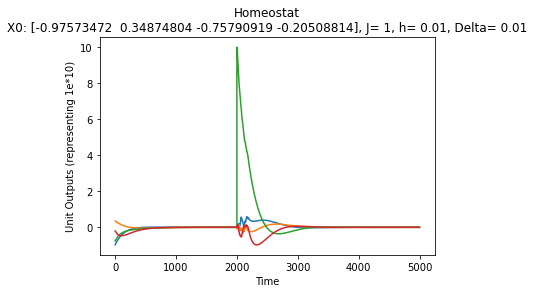

In [5]:
# plot unit outputs
x_1, x_dot, x_dot_dot, det_list = dUdt(X0, chg, t, j, h)
# print(np.any(x_1>1))
plt.plot(t, x_1)
plt.ylabel('Unit Outputs (representing 1e*10)')
plt.xlabel('Time')
plt.title(f'Homeostat\nX0: {X0}, J= {j}, h= {h}, Delta= {chg}')
# plt.plot(t, x_dot)
plt.show()

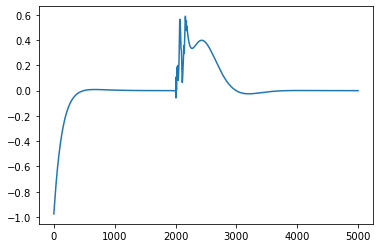

-0.8431552527481259


In [6]:
# Use to inpect individual unit output
x_1_0 = [x_1[i][0] for i in range(len(x_1))]
plt.plot(t,x_1_0)
plt.show()
print(x_1_0[2000])

In [7]:
print(x_1[10000])

[-0.44706438  0.14730886 -0.33700546 -0.46481666]


0.24172201923032002


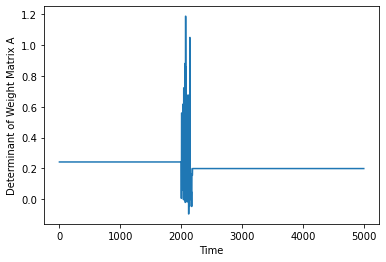

In [8]:
# plot determinant values as system evolves
plt.plot(t,det_list)
plt.ylabel('Determinant of Weight Matrix A')
plt.xlabel('Time')
plt.show()

Generate matrices with determinant values in different ranges for investigation

In [9]:
a = genMatrix()
print(a)
print(np.linalg.det(a))

[[-0.01775493  0.06512012 -0.29718478  0.35616826]
 [-0.02160948 -0.01775493  0.03763832  0.18309588]
 [-0.18026322  0.3346625  -0.01775493 -0.47971622]
 [-0.08501568  0.00789049 -0.06354986 -0.01775493]]
-0.0020695766746472587


In [10]:
b = genMatrix()
print(b)
print(np.linalg.det(b))

[[-0.93131321  0.04875783 -0.42863865  0.0732686 ]
 [-0.06026192 -0.93131321 -0.29580022 -0.30042705]
 [ 0.08851299  0.14468706 -0.93131321  0.37952405]
 [-0.41213833 -0.34586164  0.05998466 -0.93131321]]
0.6408633110752167


In [11]:
c = genMatrix()
print(c)
print(np.linalg.det(c))

[[-0.9491153  -0.47480524  0.02917696  0.18447331]
 [-0.44725961 -0.9491153   0.2834031   0.31524517]
 [ 0.1316977   0.47766044 -0.9491153  -0.43288106]
 [ 0.16268245  0.4233726  -0.06531181 -0.9491153 ]]
0.45434825095374337


In [12]:
d = genMatrix()
print(d)
print(np.linalg.det(d))

[[-0.79734064  0.4395485   0.01813271 -0.47967016]
 [ 0.47126565 -0.79734064  0.31512104 -0.107806  ]
 [-0.29889615  0.23459734 -0.79734064 -0.22733703]
 [ 0.34340589 -0.00777636 -0.26135584 -0.79734064]]
0.3649013405684406


In [16]:
e = genMatrix()
print(e)
print(np.linalg.det(e))

[[-0.35129758 -0.24894069 -0.14512013  0.3837254 ]
 [ 0.25225966 -0.35129758 -0.13157126 -0.32483274]
 [-0.49038392  0.39986229 -0.35129758  0.21426178]
 [ 0.0203537   0.3131973  -0.25798067 -0.35129758]]
0.002909711630247255


In [20]:
f = genMatrix()
print(f)
print(np.linalg.det(f))

[[-0.95070275  0.26842829  0.35365201 -0.21131146]
 [-0.26457442 -0.95070275  0.16851115  0.37420886]
 [-0.18646557 -0.18745009 -0.95070275  0.43674424]
 [-0.30227885  0.47809356  0.13642715 -0.95070275]]
0.7064683859701893


In [24]:
g = genMatrix()
print(g)
print(np.linalg.det(g))

[[-0.98755351  0.42552326 -0.37683156 -0.15198018]
 [-0.03937205 -0.98755351  0.31269705 -0.3126646 ]
 [ 0.13677391 -0.30314787 -0.98755351 -0.31995311]
 [ 0.04033203  0.44641382 -0.12472346 -0.98755351]]
1.2637121798514832


In [116]:
#updated system model function
def dUdt_2(X0, chg, t, j, h, a):

    
    det_list = []
    det = np.linalg.det(a)
    det_list.append(det)
    

    x = np.zeros((len(t),4))
    x_dot = np.zeros((len(t),4))
    x_dot_dot = np.zeros((len(t),4))

    counter = 0
    counter_for_regen = 0
    
    # Initialise initial conditions
    x[0] = X0
    
    x_dot[0] = np.zeros(4)
    x_dot_dot[0] = np.zeros(4)

    

    for i, _ in enumerate(t[1:],start=1):
        x_dot_dot[i] = -j * x_dot[i-1] + h * (a @ x[i-1])
        x_dot[i] = x_dot[i-1] + (x_dot_dot[i-1])*chg
        x[i] = x[i-1] + x_dot[i-1]*chg

        det_list.append(np.linalg.det(a))

        if t[i] == 2000:
            x[i][2] += 10

        if sum(x[i]) > 4 or sum(x[i]) < -4:
            if counter % 500 == 0:
                a = genMatrix()
                det = np.linalg.det(a)
                counter_for_regen +=1

            # Added while loop to check determinant of new matrix is in desired range
            # modify as needed
            while det < 1:
                a = genMatrix()
                det = np.linalg.det(a)
                # print("gen")
                
                
                
                # det = np.linalg.det(a)
                
        counter += 1
    
    return x, x_dot, x_dot_dot, det_list, counter_for_regen
    # return counter_for_regen

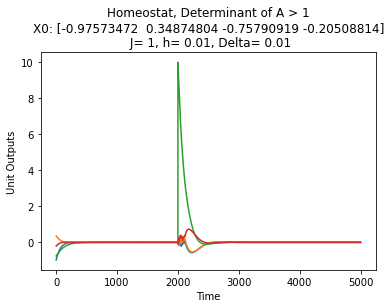

In [120]:
# x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, a)
# x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, b)
# x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, c)
# x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, d)
# x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, e)
# x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, f)
x_2, x_dot_2, x_dot_dot_2, det_list_2, num_new_matrix = dUdt_2(X0, chg, t, j, h, g)

plt.plot(t, x_2)
plt.ylabel('Unit Outputs')
plt.xlabel('Time')
plt.title(f'Homeostat, Determinant of A > 1\nX0: {X0}\n J= {j}, h= {h}, Delta= {chg}')
# plt.plot(t, x_dot)
plt.show()

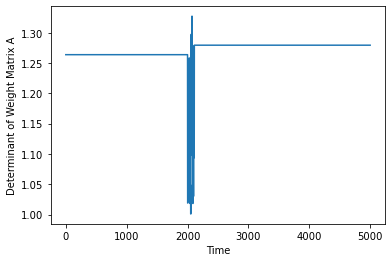

23


In [121]:
# print(det_list_2[400000])
plt.plot(t,det_list_2)
plt.ylabel('Determinant of Weight Matrix A')
plt.xlabel('Time')
plt.show()
print(num_new_matrix)

In [99]:
# matrix in ascnding order of detrminant [e,d,c,f,g]
# calculate averages
total_num_new_matrix = 0
for _ in range(10):
    num_new_matrix = dUdt_2(X0, chg, t, j, h, e)
    total_num_new_matrix += num_new_matrix
ave_new_matrix_e = total_num_new_matrix/10
print(ave_new_matrix_e)


57.4


In [100]:
total_num_new_matrix = 0
for _ in range(10):
    num_new_matrix = dUdt_2(X0, chg, t, j, h, d)
    total_num_new_matrix += num_new_matrix
ave_new_matrix_d = total_num_new_matrix/10
print(ave_new_matrix_d)


55.0


In [101]:
total_num_new_matrix = 0
for _ in range(10):
    num_new_matrix = dUdt_2(X0, chg, t, j, h, c)
    total_num_new_matrix += num_new_matrix
ave_new_matrix_c = total_num_new_matrix/10
print(ave_new_matrix_c)


61.4


In [102]:
total_num_new_matrix = 0
for _ in range(10):
    num_new_matrix = dUdt_2(X0, chg, t, j, h, f)
    print(num_new_matrix)
    total_num_new_matrix += num_new_matrix
ave_new_matrix_f = total_num_new_matrix/10
print(ave_new_matrix_f )


40
63
39
50
55
47
57
62
65
65
54.3


In [103]:
total_num_new_matrix = 0
for _ in range(10):
    num_new_matrix = dUdt_2(X0, chg, t, j, h, g)
    print(num_new_matrix)
    total_num_new_matrix += num_new_matrix
ave_new_matrix_g = total_num_new_matrix/10
print(ave_new_matrix_g)

66
67
65
77
70
77
73
63
52
60
67.0


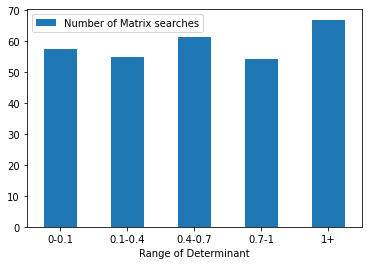

In [112]:
# dict_regens = {'0-0.1':[57.4], '0.1-0.4':[55.0], '0.4-0.7':[61.4], '0.7-1':[54.3], '1+':[67.0]}
# df = pd.DataFrame(dict_regens, index=['Number of new Matrix searches'])
num_new_matrix_for_each_range = [57.4, 55.0, 61.4, 54.3, 67.0]
index = ['0-0.1', '0.1-0.4', '0.4-0.7',
         '0.7-1', '1+']
df = pd.DataFrame({'Number of Matrix searches': num_new_matrix_for_each_range}, index=index)

ax = df.plot.bar(rot=0)
ax.set_xlabel('Range of Determinant')

# print(df)
plt.show()